## For K fold

In [1]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pprint import pprint
import random
import math
from numpy.linalg import inv

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Preprocessing Input data
df = pd.read_csv('AdmissionDataset/data.csv')

In [3]:
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['Chance of Admit ']


In [4]:
#Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
# x

#append col (with all rows having value =1) in x
temp=np.ones((len(x),1))
x=np.append(temp,x,axis=1)

y = y.values
y.resize(len(y),1)

y.shape

/home/anjul/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(450, 1)

In [5]:
#function for calculating gradient descent
def gradientDescent(trainx,y,Q,iters,LR,lamba):
    for i in range(iters):
        y_out = np.matmul(trainx, Q.T)
        summation1 = np.sum(trainx * (y_out - y), axis=0)
        summation2 = np.add(summation1, lamba*Q)
        Q = Q - ((LR/len(trainx)) * summation2)
        
#         y_pred = np.matmul(testx,Q.T)
#         cost = np.sum((testy - y_pred)**2)/(2*len(testy))
#         print(cost)
        
    return Q

In [38]:
Q = np.zeros([1,8])
LR = 0.001
iters = 10000
##hyperparameter lamba
lamba =  15

error_list1 = []
k_list1 = [2,3,5,6,9,10,15,25,30,45,50]
# k1 = 2

In [39]:
x.shape

(450, 8)

In [40]:
for k1 in k_list1:
    summ = 0
    cv = KFold(n_splits=k1,shuffle=False)
    for train_index, test_index in cv.split(x):
        trainx,testx,trainy,testy = x[train_index], x[test_index], y[train_index], y[test_index]

        # for lamba in range(1,10000,100):
        Q_res = gradientDescent(trainx,trainy,Q,iters,LR,lamba)
        #print(Q_res)
        y_pred = np.matmul(testx,Q_res.T)
        # print(y_pred)

        ##Calculating error for Ridge regression
        error = np.sum((testy - y_pred)**2)/(2*len(testy))
        print(error)
        summ+=error
    error_list1.append(summ/k1)


# print(k_list1)
# print(error_list)


0.002889442022364794
0.0028483099543785253
0.0029138941900073018
0.002483650344809376
0.0028285723219930755
0.0027927757000775675
0.0027668869986157696
0.002248739389345511
0.0027074586458303556
0.002973667566037238
0.0029361336745191173
0.0026744839559401006
0.0024344353476188707
0.0024757646208717677
0.0024890638372279707
0.002974135103934998
0.0033632309917411367
0.001658603442947468
0.003335417973653491
0.0025489821740069564
0.0025050079396575424
0.0023254398238570103
0.0021740454641751734
0.0031268355691698255
0.002828220945805286
0.002843934419617602
0.002621154975094999
0.0032280618839651315
0.0022185769072932526
0.002440423666939116
0.002077274030563892
0.002775650910028114
0.002490908844980081
0.0029133031922219032
0.0029343285194763855
0.0027960861880293704
0.0036615092343630406
0.0016711774661102633
0.003111188206714946
0.002610614385198383
0.0024118116597325536
0.0021866100094537484
0.0033085498948214618
0.0013049261706079784
0.003090433924492836
0.0019829525430855545
0.002

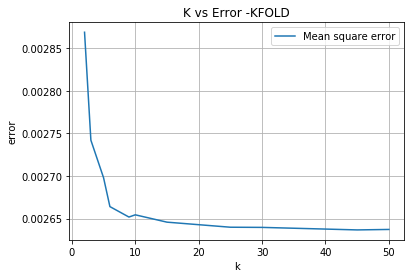

In [41]:
#plotting graphs    
plt.plot(k_list1,error_list1,label="Mean square error")
plt.title('K vs Error -KFOLD')
plt.xlabel('k')
plt.ylabel('error')
plt.grid(True)
plt.legend()
plt.show()

## For LOO


In [53]:
# for k1 in k_list2:
summ = 0
cv = KFold(n_splits=450,shuffle=False)
for train_index, test_index in cv.split(x):
    trainx,testx,trainy,testy = x[train_index], x[test_index], y[train_index], y[test_index]

    # for lamba in range(1,10000,100):
    Q_res = gradientDescent(trainx,trainy,Q,iters,LR,lamba)
    #print(Q_res)
    y_pred = np.matmul(testx,Q_res.T)
    # print(y_pred)

    ##Calculating error for Ridge regression
    error = np.sum((testy - y_pred)**2)/(2*len(testy))
#     print(error)
    summ+=error
print(summ/450)


# print(k_list1)
# print(error_list)



0.0026356427634642208
